In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

ukdale = DataSet(r'E:\重庆师范大学\研一上\非侵入式负荷检测\program\data\ukdale_h5\ukdale.h5')
elec = ukdale.buildings[1].elec
elec

ModuleNotFoundError: No module named 'nilm_metadata'

In [2]:

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

ukdale = DataSet(r'E:\重庆师范大学\研一上\非侵入式负荷检测\program\data\ukdale_h5\ukdale.h5')
elec = ukdale.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

In [4]:
elec.mains()

ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

测量设备54（也就是site_meter）的总功率数据，也就是的所有电器的aggregation power

In [5]:
elec.mains().power_series_all_data().head()

2013-03-17 19:12:43.100000+00:00    337.880005
2013-03-17 19:12:44.100000+00:00    339.429993
2013-03-17 19:12:45.100000+00:00    340.630005
2013-03-17 19:12:46.100000+00:00    338.799988
2013-03-17 19:12:47.100000+00:00    340.880005
Name: (power, active), dtype: float32

In [6]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

运行可看到，所有子测量设备测量的所有电器power的总和，占site_meter测量的总power的比重为0.79左右，这说明可能有无用功率


In [7]:
#运行比较久(7分钟)，知道就好
#elec.proportion_of_energy_submetered()

现在要找出是哪个环节出现了上述问题：

In [3]:
mains = elec.mains()
mains.available_ac_types('power')

['active', 'apparent']

In [9]:
elec.submeters().available_ac_types('power')

['apparent', 'active']

Active power P = V x I cosϕ = V I cosϕ

Reactive power Pr or Q = V x I sinϕ = V I sinϕ

Apparent power Pa or S = V x I = VI


In [11]:
next(elec.load()) #kWh

KeyboardInterrupt: 

Exception ignored in: '_pydevd_frame_eval.pydevd_frame_evaluator.get_bytecode_while_frame_eval_38'
Traceback (most recent call last):
  File "_pydevd_frame_eval/pydevd_frame_evaluator.pyx", line 258, in _pydevd_frame_eval.pydevd_frame_evaluator.get_func_code_info
  File "f:\Anaconda\envs\nilmtk-env\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 885, in get_abs_path_real_path_and_base_from_frame
    ret = get_abs_path_real_path_and_base_from_file(f)
  File "f:\Anaconda\envs\nilmtk-env\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 852, in get_abs_path_real_path_and_base_from_file
    abs_path, canonical_normalized_filename = _abs_and_canonical_path(f)
  File "f:\Anaconda\envs\nilmtk-env\lib\site-packages\debugpy\_vendored\pydevd\pydevd_file_utils.py", line 411, in _abs_and_canonical_path
    real_path = _apply_func_and_normalize_case(filename, os_path_real_path, isabs, normalize)
  File "f:\Anaconda\envs\nilmtk-env\lib\site-packages\debugp

StopIteration: 

Total Energy

In [12]:
elec.mains().total_energy() # returns kWh

KeyboardInterrupt: 

Energy per submeter：可以发现，有些设备只有实际功率，有些设备有表面功率

The function fraction_per_meter does the same thing as energy_per_submeter but returns the fraction of energy per meter.

In [13]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

,"(2, 1, UK-DALE)","(3, 1, UK-DALE)","(4, 1, UK-DALE)","(5, 1, UK-DALE)","(6, 1, UK-DALE)","(7, 1, UK-DALE)","(8, 1, UK-DALE)","(9, 1, UK-DALE)","(10, 1, UK-DALE)","(11, 1, UK-DALE)",...,"(44, 1, UK-DALE)","(45, 1, UK-DALE)","(46, 1, UK-DALE)","(47, 1, UK-DALE)","(48, 1, UK-DALE)","(49, 1, UK-DALE)","(50, 1, UK-DALE)","(51, 1, UK-DALE)","(52, 1, UK-DALE)","(53, 1, UK-DALE)"
active,NaN,NaN,68.972822,503.035078,295.585025,199.289331,NaN,302.348581,270.362653,161.878999,...,0.559742,1.738251,0.096415,3.389437,6.576957,11.133506,6.489527,32.220704,5.601561,3.43808
apparent,300.36771,164.491409,NaN,NaN,NaN,NaN,372.418569,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraction_per_meter = elec.submeters().fraction_per_meter() # kWh, again
fraction_per_meter

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

(2, 1, UK-DALE)     0.061183
(3, 1, UK-DALE)     0.033506
(4, 1, UK-DALE)     0.014049
(5, 1, UK-DALE)     0.102465
(6, 1, UK-DALE)     0.060209
(7, 1, UK-DALE)     0.040594
(8, 1, UK-DALE)     0.075860
(9, 1, UK-DALE)     0.061587
(10, 1, UK-DALE)    0.055071
(11, 1, UK-DALE)    0.032974
(12, 1, UK-DALE)    0.144233
(13, 1, UK-DALE)    0.031270
(14, 1, UK-DALE)    0.017564
(15, 1, UK-DALE)    0.003104
(16, 1, UK-DALE)    0.003609
(17, 1, UK-DALE)    0.011255
(18, 1, UK-DALE)    0.021182
(19, 1, UK-DALE)    0.006784
(20, 1, UK-DALE)    0.000254
(21, 1, UK-DALE)    0.004747
(22, 1, UK-DALE)    0.015452
(23, 1, UK-DALE)    0.003850
(24, 1, UK-DALE)    0.000481
(25, 1, UK-DALE)    0.076768
(26, 1, UK-DALE)    0.001627
(27, 1, UK-DALE)    0.000679
(28, 1, UK-DALE)    0.008662
(29, 1, UK-DALE)    0.003608
(30, 1, UK-DALE)    0.000002
(31, 1, UK-DALE)    0.014816
(32, 1, UK-DALE)    0.008987
(33, 1, UK-DALE)    0.000188
(34, 1, UK-DALE)    0.000556
(35, 1, UK-DALE)    0.001275
(36, 1, UK-DAL

Select meters on the basis of their energy consumption

In [ ]:
energy_per_meter_active = energy_per_meter.loc['active']
more_than_20 = energy_per_meter_active[energy_per_meter_active > 20]
more_than_20

(4, 1, UK-DALE)      68.972822
(5, 1, UK-DALE)     503.035078
(6, 1, UK-DALE)     295.585025
(7, 1, UK-DALE)     199.289331
(9, 1, UK-DALE)     302.348581
(10, 1, UK-DALE)    270.362653
(11, 1, UK-DALE)    161.878999
(12, 1, UK-DALE)    708.084476
(13, 1, UK-DALE)    153.515542
(14, 1, UK-DALE)     86.226017
(17, 1, UK-DALE)     55.252575
(18, 1, UK-DALE)    103.991238
(19, 1, UK-DALE)     33.302901
(21, 1, UK-DALE)     23.302626
(22, 1, UK-DALE)     75.857381
(28, 1, UK-DALE)     42.525236
(31, 1, UK-DALE)     72.736971
(32, 1, UK-DALE)     44.121251
(42, 1, UK-DALE)     58.486883
(43, 1, UK-DALE)    210.090821
(51, 1, UK-DALE)     32.220704
Name: active, dtype: float64

Plot fraction of energy consumption of each appliance

In [ ]:
fraction = elec.submeters().fraction_per_meter().dropna()

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

f:\Anaconda\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


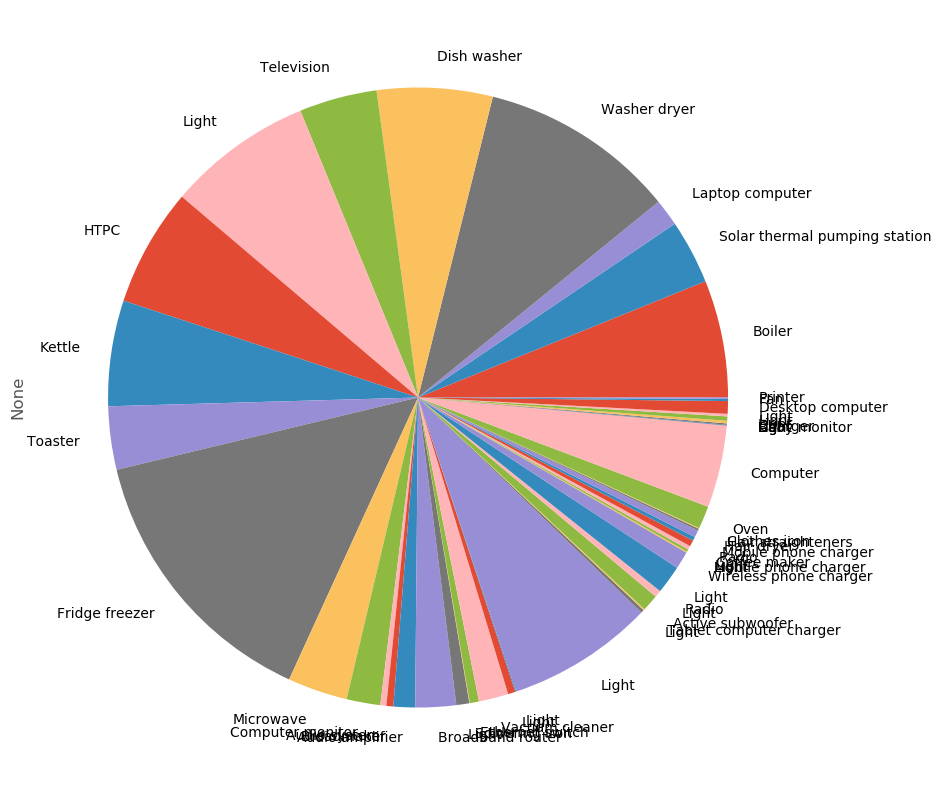

In [ ]:
# Create convenient labels
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

Draw wiring diagram

f:\Anaconda\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


(<networkx.classes.digraph.DiGraph at 0x17cbaa70e50>,
 <matplotlib.axes._axes.Axes at 0x17cbaa8a400>)

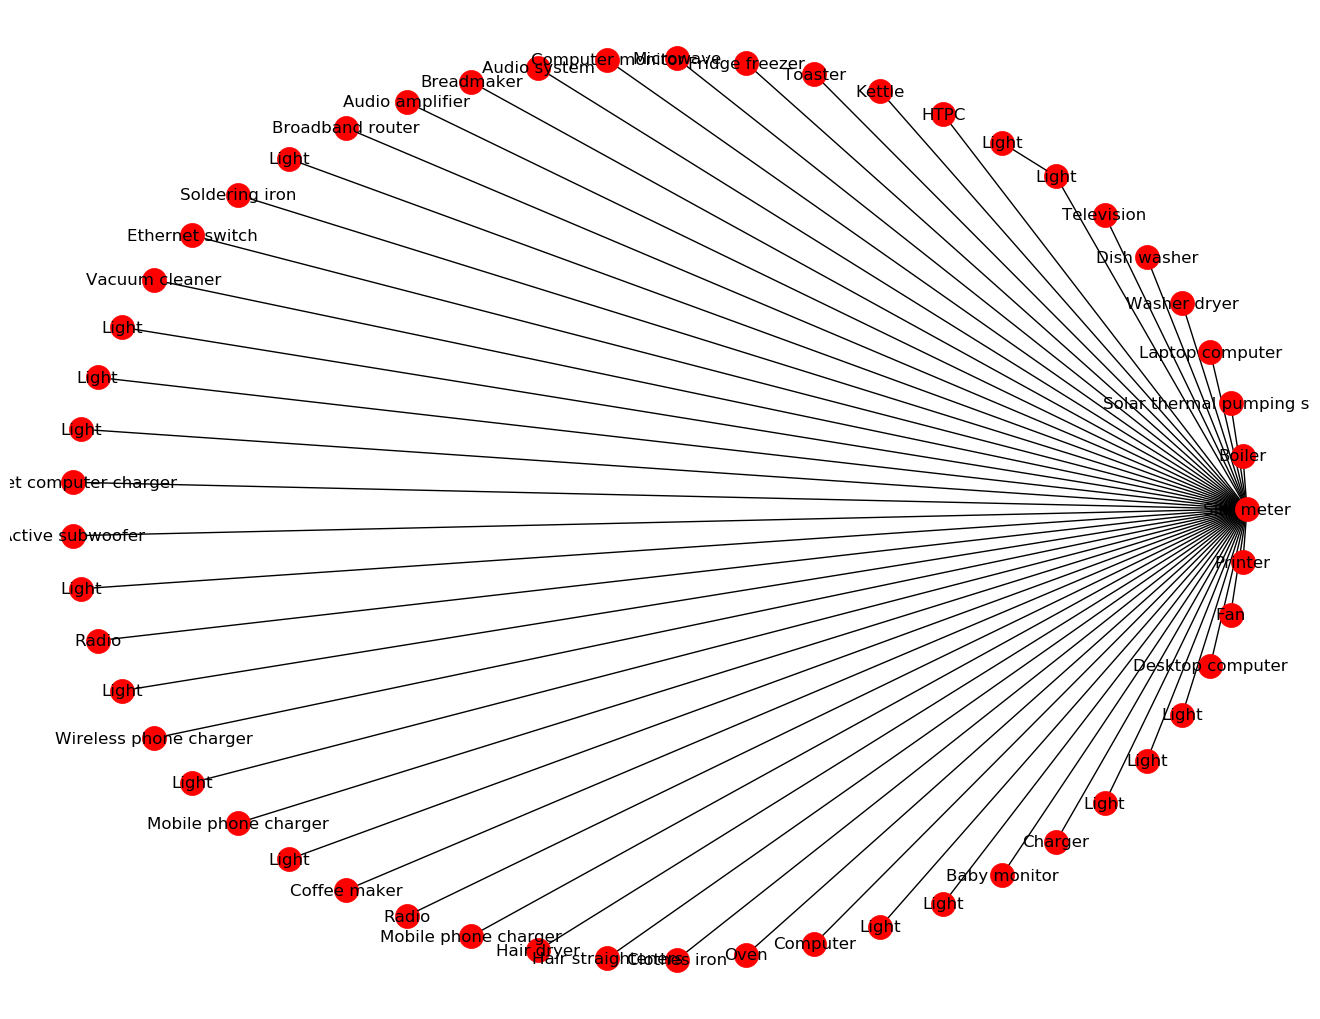

In [ ]:
elec.draw_wiring_graph()

site_meter的下流meter，也就是 2-53号 meter

In [ ]:
elec.meters_directly_downstream_of_mains()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  ElecMeter(instance=10, building=1, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='food processor', instance

Plot appliances when they are in use

f:\Anaconda\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


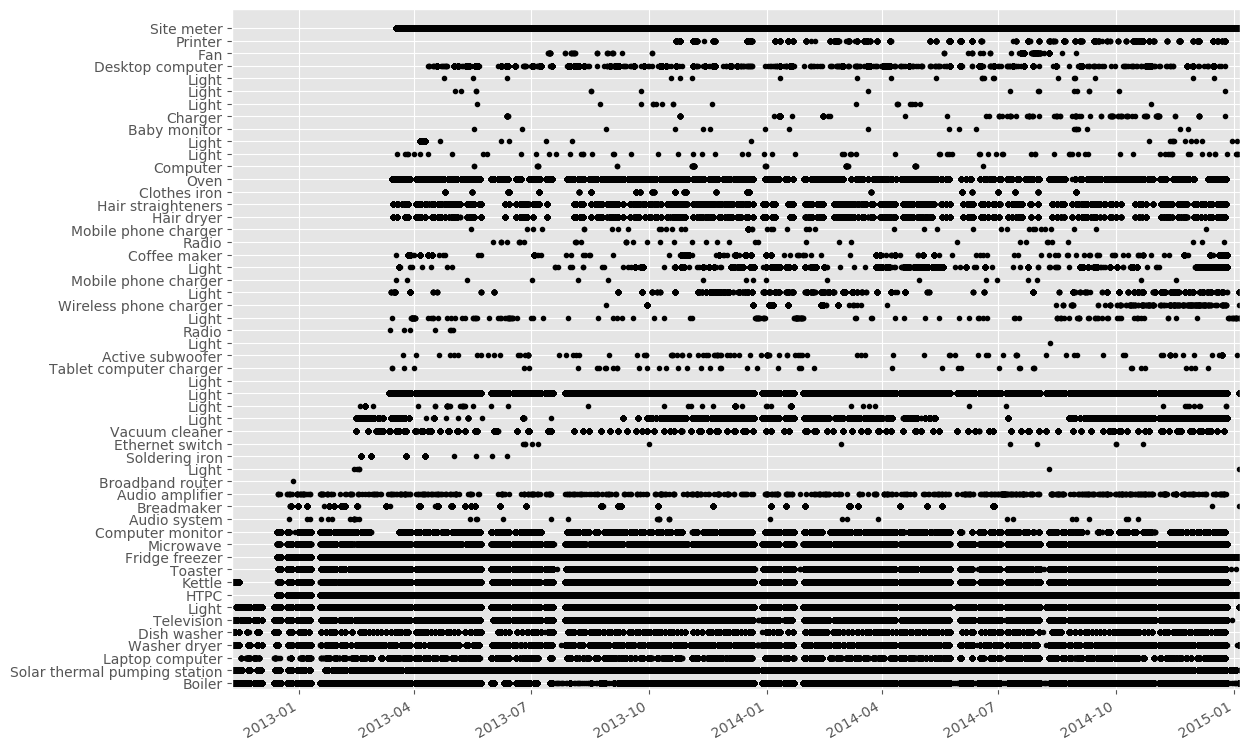

In [19]:
elec.plot_when_on(on_power_threshold = 40)

单个电器测量仪器的信息和状态

In [5]:
fridge_meter = elec['fridge']

#冰箱的上层测量设备（也就是site_meter）
fridge_meter.upstream_meter() 

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
  ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
)

In [6]:
fridge_meter.device #冰箱测量设备的信息

{'max_sample_period': 120,
 'model_url': 'https://shop.edfenergy.com/Item.aspx?id=540',
 'wireless_configuration': {'base': 'creators: [Jack Kelly] model: rfm_edf_ecomanager model_url: https://github.com/JackKelly/rfm_edf_ecomanager/\n',
  'protocol': 'custom',
  'carrier_frequency': 434},
 'brand': 'EcoManager',
 'measurements': [{'lower_limit': 0,
   'upper_limit': 3300,
   'physical_quantity': 'power',
   'type': 'active'}],
 'data_logger': {'model': 'rfm_ecomanager_logger',
  'creators': ['Jack Kelly'],
  'model_url': 'https://github.com/JackKelly/rfm_ecomanager_logger'},
 'sample_period': 6,
 'wireless': True,
 'brand_url': 'http://www.edfenergy.com/products-services/for-your-home/ecomanager',
 'model': 'EcoManagerTxPlug',
 'seller': 'EDF Energy',
 'manufacturer': 'Current Cost / Sailwider'}

Dominant appliance：如果一个测量设备同时检测多个电器，则返回主要检测的那个

In [7]:
fridge_meter.dominant_appliance()

Appliance(type='fridge freezer', instance=1)

In [9]:
fridge_meter.total_energy() # kWh

active    708.084476
dtype: float64

Get good sections：如果直接画出冰箱功率原始数据，会发现图片放大后有很多小间隔，通过使用good_section函数也发现白色部分为数据缺失(设备没开启)部分。

f:\Anaconda\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


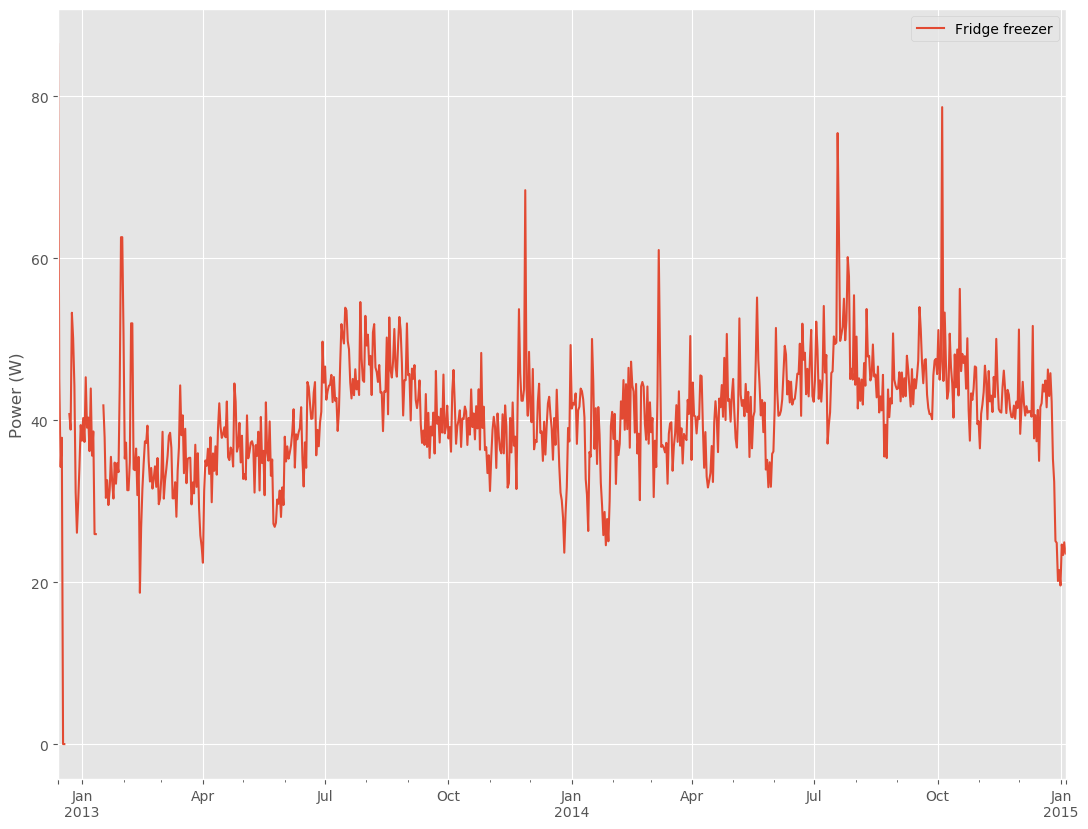

In [10]:
fridge_meter.plot()

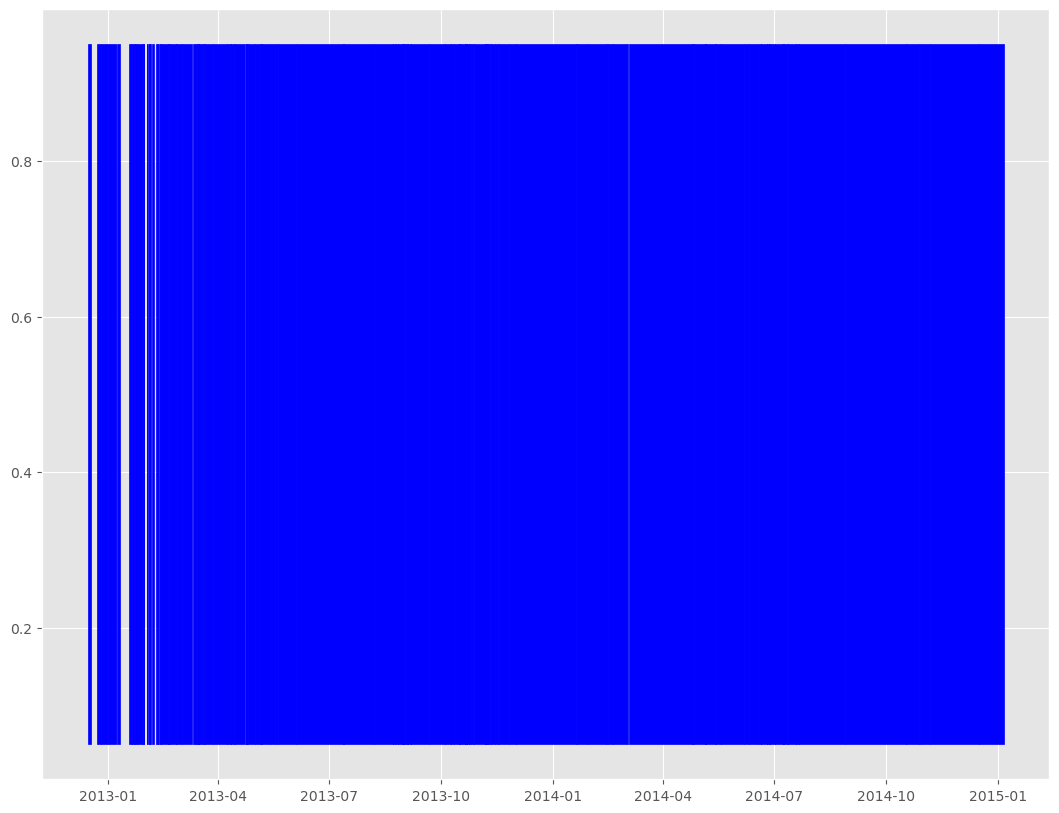

In [11]:
good_sections = fridge_meter.good_sections(full_results=True)

good_sections.plot()    #后半部分貌似没有缺失数据，但其实放大后也会有很多small gap

In [12]:
good_sections.combined()

[TimeFrame(start='2012-12-14 22:21:32+00:00', end='2012-12-17 18:10:42+00:00', empty=False),
 TimeFrame(start='2012-12-22 16:46:30+00:00', end='2012-12-25 16:40:31+00:00', empty=False),
 TimeFrame(start='2012-12-25 17:53:17+00:00', end='2012-12-31 21:56:11+00:00', empty=False),
 TimeFrame(start='2012-12-31 21:59:35+00:00', end='2013-01-07 11:08:53+00:00', empty=False),
 TimeFrame(start='2013-01-07 11:24:25+00:00', end='2013-01-07 12:54:33+00:00', empty=False),
 TimeFrame(start='2013-01-07 15:46:35+00:00', end='2013-01-10 11:32:17+00:00', empty=False),
 TimeFrame(start='2013-01-17 17:38:33+00:00', end='2013-01-19 21:23:45+00:00', empty=False),
 TimeFrame(start='2013-01-19 21:46:24+00:00', end='2013-01-20 13:08:51+00:00', empty=False),
 TimeFrame(start='2013-01-20 13:41:19+00:00', end='2013-01-21 14:08:36+00:00', empty=False),
 TimeFrame(start='2013-01-21 18:01:20+00:00', end='2013-01-22 09:10:51+00:00', empty=False),
 TimeFrame(start='2013-01-22 09:20:41+00:00', end='2013-01-22 12:51:19

In [13]:
# The dropout rate is a number between 0 and 1 which specifies the proportion of missing samples
fridge_meter.dropout_rate()

0.13996738822432603

In [14]:
#选取特定电器的所有测量设备
nilmtk.global_meter_group.select_using_appliances(type='washer dryer')  #3号家庭没有烘干机

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=12, building=2, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])
  ElecMeter(instance=24, building=5, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
)

In [15]:
elec.select_using_appliances(type=['fridge', 'microwave'])  #多选也是可以的

MeterGroup(meters=
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=13, building=1, dataset='UK-DALE', appliances=[Appliance(type='microwave', instance=1)])
)

In [16]:
nilmtk.global_meter_group.select_using_appliances(category='heating')   #也可以根据电器属性来选

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
  ElecMeter(instance=3, building=3, dataset='UK-DALE', appliances=[Applianc

In [17]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')  #这是根据啥来选？

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=1, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='food processor', instance=1), Appliance(type='toasted sandwich mak

In [21]:
elec.select(sample_period=6)    #根据采样率选择

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

In [22]:
elec.select_using_appliances(type='fridge') #如果不指定instance，默认返回1号电器


MeterGroup(meters=
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
)

In [23]:
elec['light', 2]    #指定返回的电器编号 

ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])

In [24]:
# 要从nilmtk.global_meter_group函数取出特定电器，需要指定多个属性
nilmtk.global_meter_group[{'dataset': 'UK-DALE', 'building': 1, 'type': 'fridge', 'instance': 1}]

ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])

Search for a meter using details of the ElecMeter

In [26]:
elec[2]

ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])

In [27]:
#提取特定测量设备，需要3个属性值：
from nilmtk.elecmeter import ElecMeterID 
# ElecMeterID is a namedtuple for uniquely identifying each ElecMeter

nilmtk.global_meter_group[ElecMeterID(instance=8, building=1, dataset='UK-DALE')]

ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])

Select nested MeterGroup：选择测量同个电器的测量设备组（在本例中，也就是building1中，不存在）
elec[ElecMeterID(instance=(3,4), building=1, dataset='UK-DALE')]    #会报错

In [32]:
elec[ElecMeterID(instance=0, building=1, dataset='UK-DALE')]   #第0号测量设备就是site_meter（本例中相当于54号）

ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

In [33]:
#运行太久了
'''
ukdale.set_window(end='2013-04-22')
elec.plot()
plt.xlabel("Time")
'''

f:\Anaconda\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
f:\Anaconda\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
f:\Anaconda\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
f:\Anaconda\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
f:\Anaconda\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index re

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000029367486AF0> (for post_execute):


KeyboardInterrupt: 

Autocorrelation Plot

KeyboardInterrupt: 

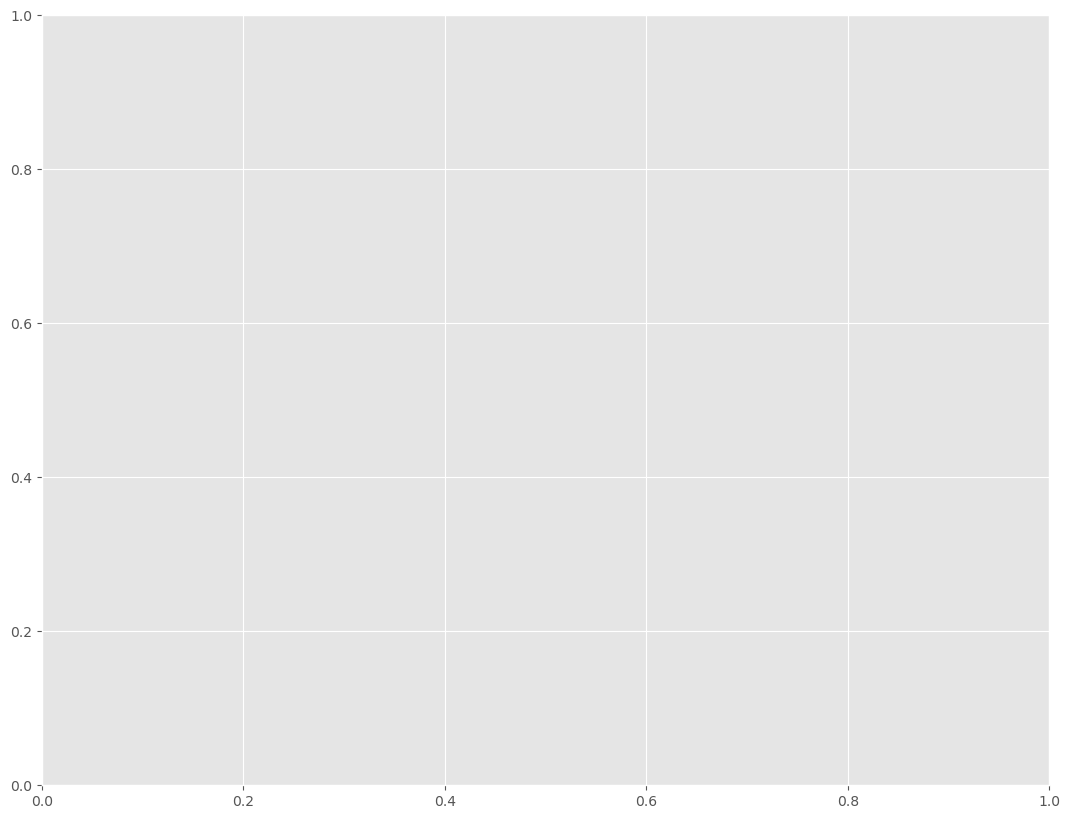

In [36]:
#运行太久了
'''
from pandas.plotting import autocorrelation_plot

elec.mains().plot_autocorrelation()
'''

In [ ]:
fridges_restricted = nilmtk.global_meter_group.select_using_appliances(type='fridge')
daily_energy = pd.Series([meter.average_energy_per_period(offset_alias='D') 
                          for meter in fridges_restricted.meters])

# daily_energy.plot(kind='hist');
# plt.title('Histogram of daily fridge energy');
# plt.xlabel('energy (kWh)');
# plt.ylabel('occurences');
# plt.legend().set_visible(False)

daily_energy

0    active    0.975252
dtype: float64
1    active    1.100177
dtype: float64
2    active    0.843042
dtype: float64
3    active    0.937718
dtype: float64
dtype: object

In [ ]:
correlation_df = elec.pairwise_correlation()
correlation_df